# SOLUCIÓN TALLER 3: ÁRBOLES Y REDES

## Presentado Por: 
## - Daiver Rolando Guzman
## - Manuel Antonio García

## Mayo de 2022

## Asignatura: Visualización para ciencia de datos en Python

# Librerías de Visualización

## Importar librerías 

In [11]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=d0f4b4653b28bd4b71fb4f302ff764e4bf8065adc85e006e2064620421c193a6
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
Successfully built pyvis


In [13]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import plotly.express as px

## Carga de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BD.xlsx') 


In [ ]:
Data.head()

,PACIENTE,SEXO,EDAD,LUGAR DE NACIMIENTO,DOMINANCIA,ESTRATO,NIVEL EDUCATIVO,CATEGORIA ANTECEDENTES,ANTECEDENTES FAMILIARES,MEDICAMENTOS ACTUALMENTE CONSUMIDOS,...,MASA PIEL (kg),MASA ÓSEA (kg),MASA RESIDUAL (kg),MASA MUSCULAR (kg),MASA ADIPOSA (kg),INDICE MUSCULAR GRASO,ENDOMORFIA,MESOMORFIA,ECTOMORFIA,SOMATOTIPO
0,1,Famale,32,Apulo,Diestro,3,Profesional,ENF CARDIOVAS,Enfermedad cerebrovascular,Ninguno,...,3.2,4.7,4.6,21.2,21.7,0.976959,5.77,4.63,1.30,ENDO MESOMORFICO
1,2,Male,44,Bogotá,Diestro,2,Profesional,ENF CARDIOVAS,Tromboflebitis,Ninguno,...,3.5,7.0,7.2,28.8,22.0,1.309091,5.57,5.34,1.10,ENDOMORFO MESOMORFO
2,3,Famale,58,Bogotá,Diestro,4,Posgrado,CÁNCER,"Cáncer de estómago, arritmia cardiaca, diabete...",Atorvastatina,...,3.9,7.4,9.6,27.3,33.3,0.819820,7.72,4.96,0.50,ENDO MESOMORFICO
3,4,Famale,34,Bogotá,Diestro,2,Técnico,CÁNCER,Cáncer de tiroides,Ninguno,...,3.3,6.9,5.7,23.9,34.0,0.702941,9.04,5.66,0.00,ENDO MESOMORFICO
4,5,Famale,37,Bogotá,Diestro,3,Profesional,ENF CARDIOVAS,Hipoglicemia,Ninguno,...,2.7,4.8,4.0,15.8,16.8,0.940476,6.00,4.26,2.29,ENDO MESOMORFICO


# Treemap

In [ ]:
pd.crosstab(Data['CATEGORIA ANTECEDENTES'],Data['NIVEL EDUCATIVO'])

NIVEL EDUCATIVO,Bachiller,Posgrado,Profesional,Tecnólogo,Técnico
CATEGORIA ANTECEDENTES,,,,,
CÁNCER,13,4,13,9,3
ENF CARDIOVAS,3,5,12,7,4
NINGUNO,3,1,3,0,2


In [ ]:
fig = px.treemap(Data, path=['CATEGORIA ANTECEDENTES', 'NIVEL EDUCATIVO'],
                 values='INDICE MUSCULAR GRASO')
  
fig.show()

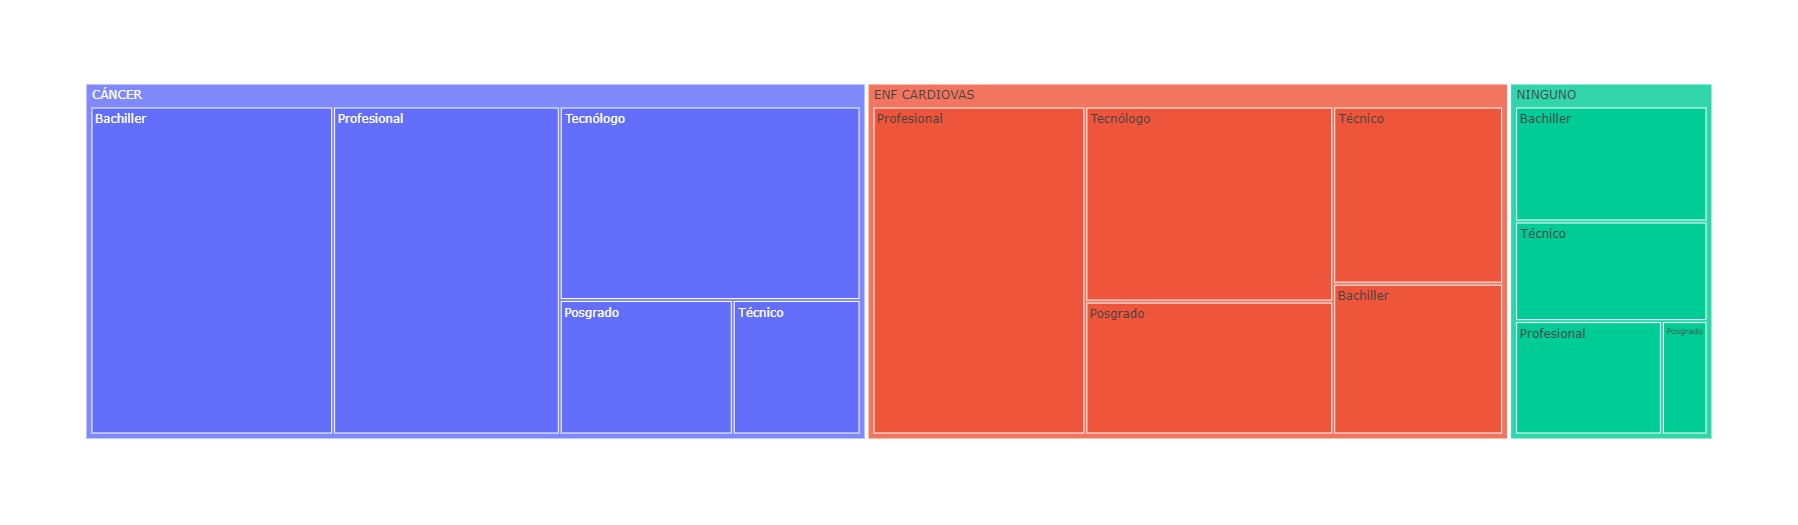

### **Visualización:** Enfermedades de antecedentes familiares asociados al nivel educativo para calcular el índice muscular graso de cada individuo.

#### El grafico Treemap nos muestra el total individuos asociados por enfermedades familiares desagregado por Nivel educativo evaluando cuales tienen más índice muscular graso de un estudio para evaluar la relación entre la masa muscular, masa grasa y riesgo cardio metabólico en adultos entre 20 y 60 años aparentemente sanos en la ciudad de Bogotá.

## ¿Qué?
La base de datos utilizada para la realización de la visualización proviene de la información de los pacientes adultos entre 20 y 60 años de la ciudad de Bogotá.


## ¿Por Qué?
Comparar tendencia: 
Se quiere identificar a través de las variables Categoría antecedentes (Antecedentes de enfermedades familiares) y el Nivel educativo de los mismos cuales tienen más índice de masa corporal graso.


## ¿Como?
Se realiza una codificación de las variables de estudio para evaluar en que nivel educativo tienen mayor índice de masa corporal grasa.


## Marcas y canales
Las marcas y los canales utilizados en las visualizaciones son:
Marca de área sobre la variable categoría antecedentes agrupada por nivel educativo representando cuales tiene más índice muscular graso.
Canal de posición espacial vertical para representar el índice muscular graso por nivel educativo en cada una de las categorías de antecedentes (Enfermedades familiares).
Canal de posición espacial horizontal para representar el tamaño de los niveles de índice muscular graso.


## Conclusiones 
La visualización nos ayuda a identificar que los individuos con antecedentes familiares de Cáncer en un mayor porcentaje son Bachilleres y tienen mayor índice muscular graso.
Adicionalmente se identifica que los individuos con antecedentes familiares con enfermedades cardiovasculares en un mayor porcentaje son Profesionales y tienen mayor índice muscular graso.


In [ ]:
pd.crosstab(Data['SEXO'],Data['EDAD'])

EDAD,20,21,22,23,24,25,26,27,29,30,...,51,52,53,54,55,56,57,58,59,60
SEXO,,,,,,,,,,,,,,,,,,,,,
Famale,1,2,4,3,1,1,1,1,0,0,...,1,0,0,0,4,1,1,1,1,0
Male,0,5,2,1,3,3,3,0,2,1,...,0,1,1,1,1,1,0,1,0,2


In [ ]:
fig2 = px.treemap(Data, path=['SEXO', 'EDAD'],
                 values='IMC', color='ESTRATO')
fig2

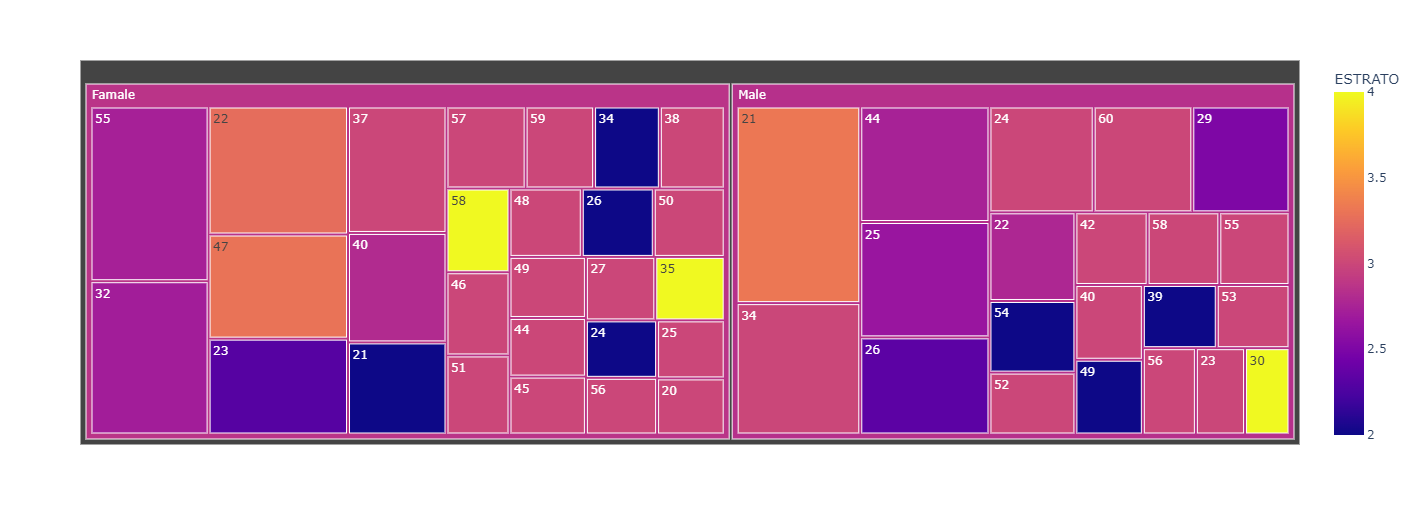

### **Visualización:** Sexo asociados a la edad para calcular el IMC de cada individuo.

#### El grafico Treemap nos muestra el total individuos asociados por Sexo desagregado por Edad evaluando cuales tienen más IMC (índice de masa corporal) de un estudio para evaluar la relación entre el índice de masa corporal,  grasa y riesgo cardio metabólico en adultos entre 20 y 60 años aparentemente sanos en la ciudad de Bogotá.

## ¿Qué?
La base de datos utilizada para la realización de la visualización proviene de la información de los pacientes adultos entre 20 y 60 años de la ciudad de Bogotá.

## ¿Por Qué?
Comparar tendencias: 
Se quiere identificar a través de las variables Categoría Sexo y la Edad de los mismos cuales tienen más índice de masa corporal.

## ¿Como?
Se realiza una codificación de las variables de estudio para evaluar por sexo y Edad, cuales pacientes presentan mayor índice de masa corporal.


## Marcas y canales
Las marcas y los canales utilizados en las visualizaciones son:
Marca de área sobre la variable categoría Sexo agrupada por Edad representando cuales tiene más índice muscular.
Canal de posición espacial vertical para representar el índice muscular por Edad en cada una de las categorías de Sexo.
Canal de posición espacial horizontal para representar el tamaño de los niveles de índice muscular.


## Conclusiones 
La visualización nos ayuda a identificar cuales grupos individuos por la variable categoría Sexo, presenta un mayor Índice de masa corporal, , en promedio para los Hombres presenta un mayor índice muscular graso  en mayor porcentaje en pacientes jóvenes.

Adicionalmente se identifica por la categoría Estrato, los pacientes con mayor estrato presentan en promedio un mayor Índice de masa corporal.


## Network-redes

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
Data2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Word_Test_Example.xlsx') 

In [16]:
Data2.head()

,Word1,Word2,Count
0,Buena,Atencion,585
1,Excelente,Atencion,465
2,Gracias,Atencion,375
3,Gracias,Ayuda,355
4,Espero,Ayuda,295


In [17]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height='750px', 
                  width='100%', 
                  bgcolor='#222222', 
                  font_color='white', 
                  notebook = True)

In [18]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from flask_ngrok import run_with_ngrok
from flask import Flask
app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
  
    return "<h1>Running Flask on Google Colab!</h1>"
  
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://e360-34-80-181-155.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [26/May/2022 05:51:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2022 05:51:10] "GET /favicon.ico HTTP/1.1" 404 -
